# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import matplotlib.dates as mdates
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
)

# DATA UPLOADING & Initial Exploration


In [ ]:
# Loading the bank marketing dataset
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')


# Basic structure of data



In [ ]:
# Shape of Dataframe (df)
print("Dataset shape:", df.shape)

Dataset shape: (41188, 21)


In [ ]:
# Names of all features
print("Dataset columns:", df.columns)

Dataset columns: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
#Preview data
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor

In [ ]:
print(df.tail())

       age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1        

In [ ]:
#check the randomly 5 rows
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
14211,29,admin.,single,university.degree,no,yes,no,telephone,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
7495,46,unemployed,divorced,basic.9y,no,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
18639,29,management,married,university.degree,no,yes,no,cellular,jul,thu,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
27029,47,technician,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
16839,51,services,single,high.school,unknown,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [ ]:
# print("\nData types and missing values:")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Check data Quality

In [ ]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 12


In [ ]:
# Remove duplicate rows
df1 = df.drop_duplicates()



In [ ]:
print(df1.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
print(df1.isna().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
#summary of numerical data
print(df1.describe())

               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860    

In [ ]:
# summary of cartegorical columns
print(df1.describe(include=['object', 'category']))

           job  marital          education default housing   loan   contact  \
count    41176    41176              41176   41176   41176  41176     41176   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10419    24921              12164   32577   21571  33938     26135   

        month day_of_week     poutcome      y  
count   41176       41176        41176  41176  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13767        8618        35551  36537  


In [ ]:
# Number of unique values in each column
print("\nUnique values per column:")
print(df1.nunique())


Unique values per column:
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


# DATA VISUALISATION

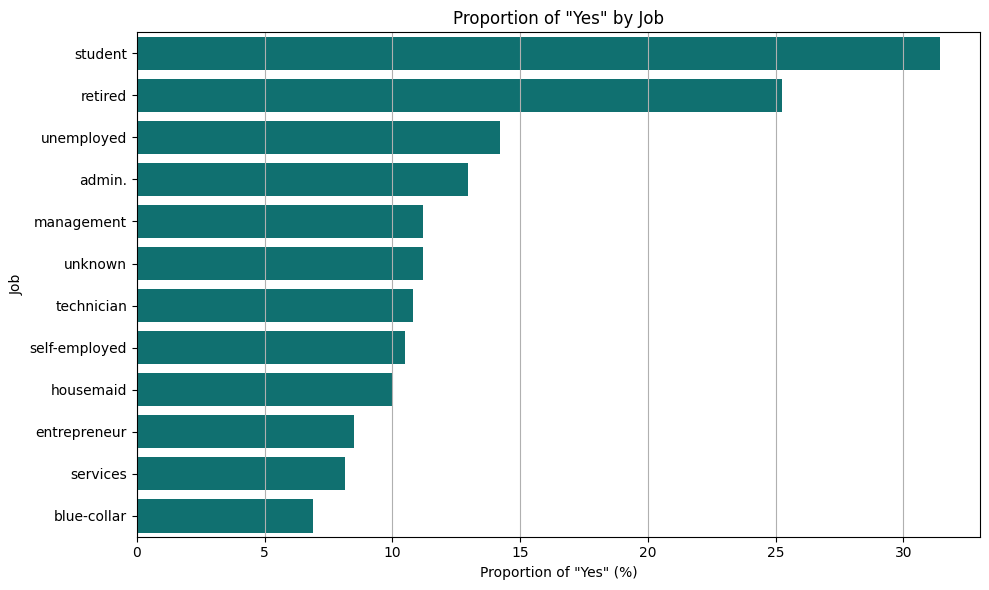

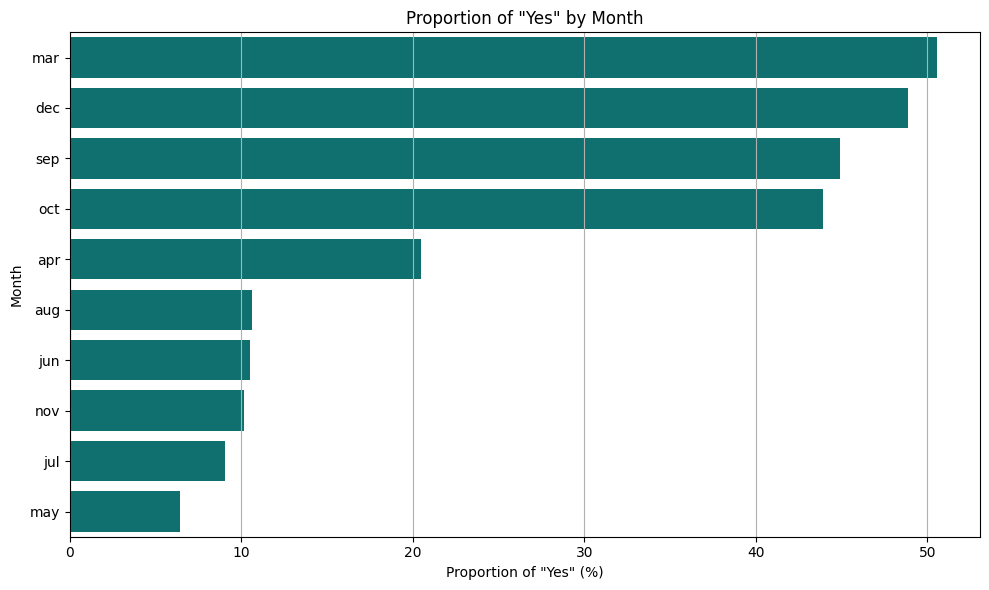

In [ ]:
# groups having higer chance of saying yes
categorical_cols = df1.select_dtypes(include='object').columns.drop('y')

proportion_tables = {}
for col in categorical_cols:
    prop_table = pd.crosstab(df[col], df1['y'], normalize='index') * 100
    prop_table = prop_table.round(2)
    prop_table.columns = [f"{c}_%" for c in prop_table.columns]
    prop_table['count'] = df1[col].value_counts()
    proportion_tables[col] = prop_table.sort_values(by='yes_%', ascending=False)


selected_tables = {key: proportion_tables[key] for key in ['job', 'month']}

for feature, table in selected_tables.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=table['yes_%'], y=table.index, color='teal')
    plt.title(f'Proportion of "Yes" by {feature.capitalize()}')
    plt.xlabel('Proportion of "Yes" (%)')
    plt.ylabel(feature.capitalize())
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()


In [ ]:
def create_crosstab(col):
    crosstab = pd.crosstab(df1[col], df1['y'], margins=True, margins_name='Total')
    crosstab['yes_prop'] = (crosstab['yes'] / crosstab['Total']).round(2)
    crosstab['no_prop'] = (crosstab['no'] / crosstab['Total']).round(2)
    return crosstab[['yes', 'no', 'yes_prop', 'no_prop', 'Total']]

for col in ['job', 'marital', 'education']:
    print(f"\n{col.upper()} vs Subscription:")
    print(create_crosstab(col))



JOB vs Subscription:
y               yes     no  yes_prop  no_prop  Total
job                                                 
admin.         1351   9068      0.13     0.87  10419
blue-collar     638   8615      0.07     0.93   9253
entrepreneur    124   1332      0.09     0.91   1456
housemaid       106    954      0.10     0.90   1060
management      328   2596      0.11     0.89   2924
retired         434   1284      0.25     0.75   1718
self-employed   149   1272      0.10     0.90   1421
services        323   3644      0.08     0.92   3967
student         275    600      0.31     0.69    875
technician      730   6009      0.11     0.89   6739
unemployed      144    870      0.14     0.86   1014
unknown          37    293      0.11     0.89    330
Total          4639  36537      0.11     0.89  41176

MARITAL vs Subscription:
y          yes     no  yes_prop  no_prop  Total
marital                                        
divorced   476   4135      0.10     0.90   4611
married   253

Text(0.5, 1.0, 'Age Distribution')

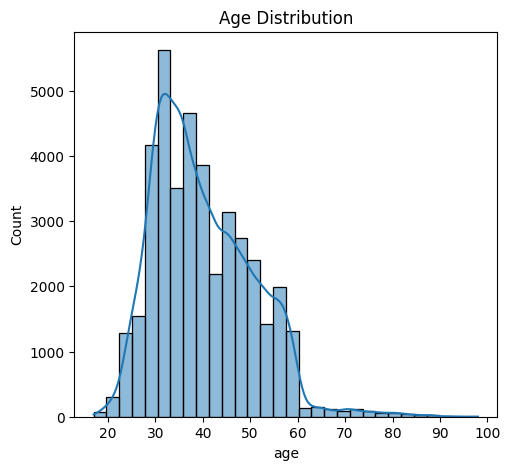

In [ ]:
# Age Distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df1['age'], bins=30, kde=True)
plt.title('Age Distribution')

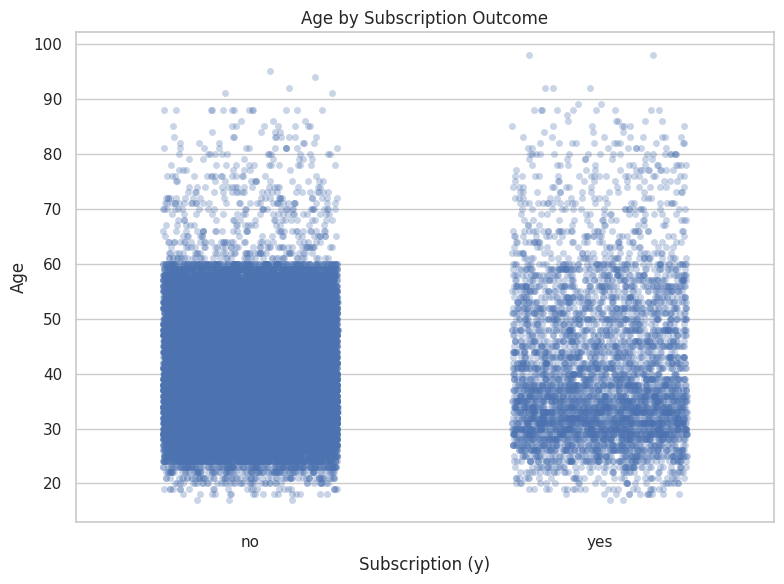

In [ ]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed

sns.stripplot(data=df1, x='y', y='age', jitter=0.25, alpha=0.3, ax=ax)
ax.set_title("Age by Subscription Outcome")
ax.set_xlabel("Subscription (y)")
ax.set_ylabel("Age")

plt.tight_layout()
plt.show()

In [ ]:
# Basic Count Table
subscription_counts = df1['y'].value_counts().to_frame('Counts')
subscription_percent = df1['y'].value_counts(normalize=True).to_frame('Percentage')
subscription_table = pd.concat([subscription_counts, subscription_percent], axis=1)
print("Distribution of Subscription Responses (Target Variable 'y'):")
print(subscription_table)

Distribution of Subscription Responses (Target Variable 'y'):
     Counts  Percentage
y                      
no    36537    0.887337
yes    4639    0.112663


<ipython-input-21-8490dbca626b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='y', palette='pastel')


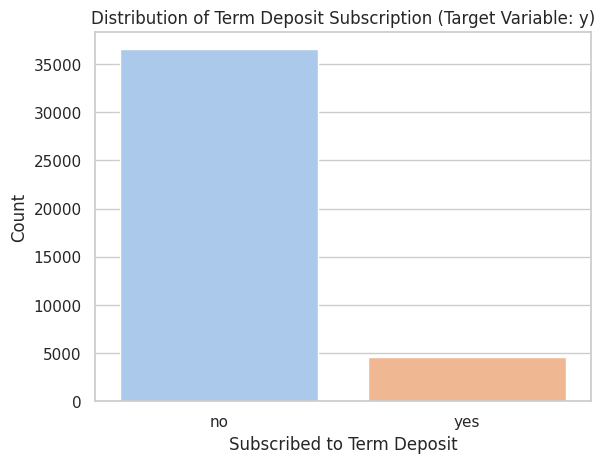

In [ ]:

sns.countplot(data=df1, x='y', palette='pastel')
plt.title('Distribution of Term Deposit Subscription (Target Variable: y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

In [ ]:
features = ['default', 'loan', 'housing']

for feature in features:
    print(f"\n--- Proportion Table for '{feature}' ---\n")

    summary = (
        df1.groupby([feature, 'y']).size()
        .unstack(fill_value=0)
    )

    summary['Total'] = summary.sum(axis=1)
    summary['Yes %'] = round((summary['yes'] / summary['Total']) * 100, 2)
    summary['No %'] = round((summary['no'] / summary['Total']) * 100, 2)

    display(summary[['yes', 'no', 'Yes %', 'No %']])



--- Proportion Table for 'default' ---



y,yes,no,Yes %,No %
default,,,,
no,4196,28381,12.88,87.12
unknown,443,8153,5.15,94.85
yes,0,3,0.00,100.00



--- Proportion Table for 'loan' ---



y,yes,no,Yes %,No %
loan,,,,
no,3849,30089,11.34,88.66
unknown,107,883,10.81,89.19
yes,683,5565,10.93,89.07



--- Proportion Table for 'housing' ---



y,yes,no,Yes %,No %
housing,,,,
no,2025,16590,10.88,89.12
unknown,107,883,10.81,89.19
yes,2507,19064,11.62,88.38


<ipython-input-23-992dcf510bed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = pd.to_datetime(df1['month'], format='%b')
<ipython-input-23-992dcf510bed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['deposit'] = df1['y'].map({'yes': 1, 'no': 0})


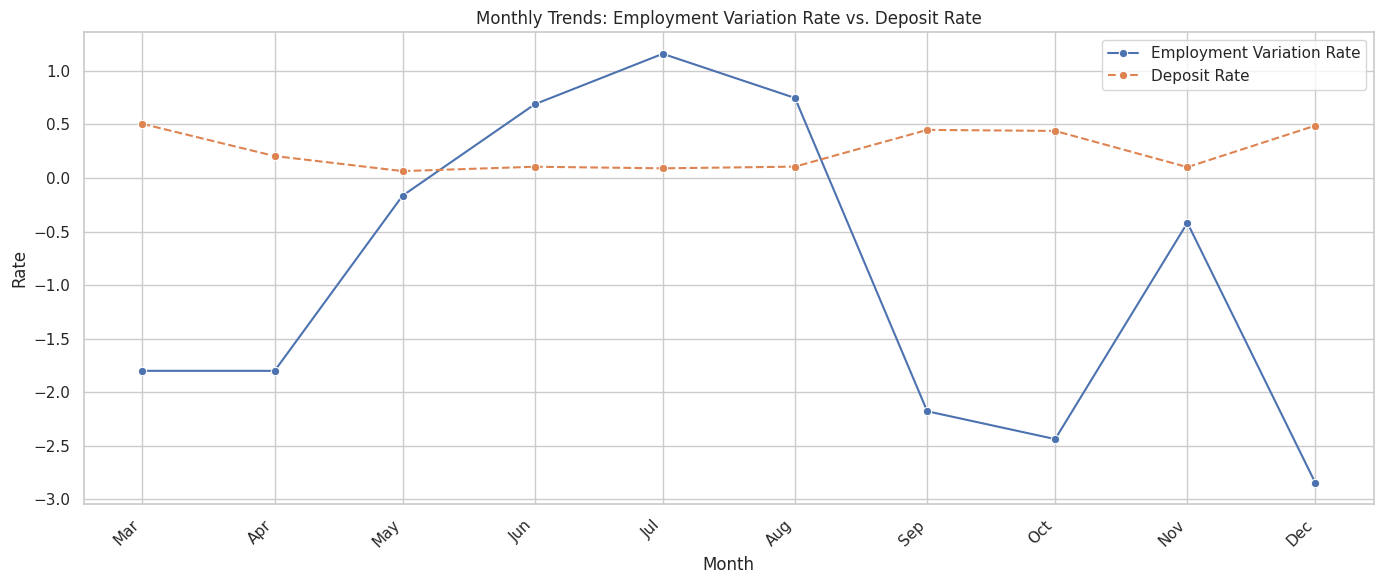

In [ ]:
df1['month'] = pd.to_datetime(df1['month'], format='%b')

df1['deposit'] = df1['y'].map({'yes': 1, 'no': 0})

monthly_avg = df1.groupby('month').agg({
    'emp.var.rate': 'mean',
    'deposit': 'mean'
}).reset_index()

plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')

# Employment Variation Rate
sns.lineplot(data=monthly_avg, x='month', y='emp.var.rate', marker='o', label='Employment Variation Rate')

# Deposit Rate
sns.lineplot(data=monthly_avg, x='month', y='deposit', marker='o', linestyle='--', label='Deposit Rate')

plt.title('Monthly Trends: Employment Variation Rate vs. Deposit Rate')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()
plt.tight_layout()
plt.show()


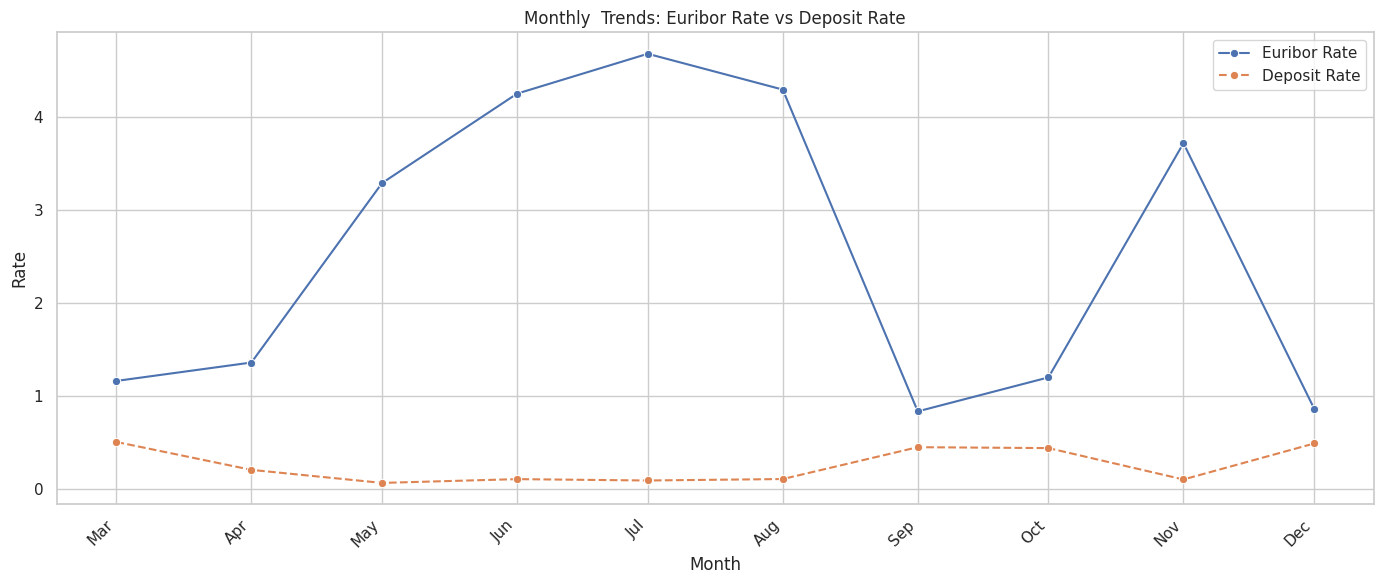

In [ ]:
monthly_data = df1.groupby('month').agg({
    'euribor3m': 'mean',
    'deposit': 'mean'
}).reset_index()


plt.figure(figsize=(14, 6))
sns.set_theme(style='whitegrid')


sns.lineplot(data=monthly_data, x='month', y='euribor3m', marker='o', label='Euribor Rate')


sns.lineplot(data=monthly_data, x='month', y='deposit', marker='o', linestyle='dashed', label='Deposit Rate')


plt.title('Monthly  Trends: Euribor Rate vs Deposit Rate')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.legend()
plt.tight_layout()
plt.show()




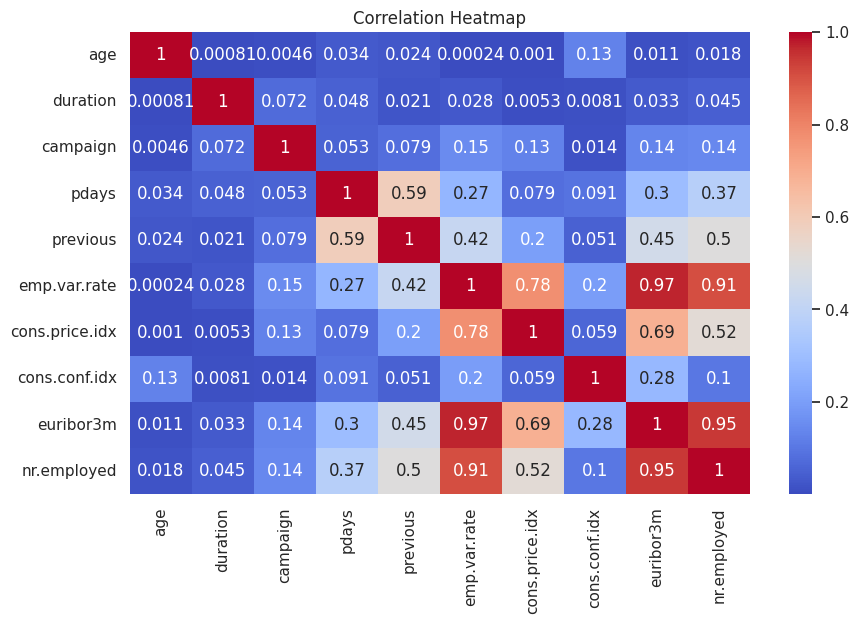

In [ ]:
# Correlation Heatmap
numerical_cols = ['age','duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ]
plt.figure(figsize=(10,6))
sns.heatmap(df1[numerical_cols].corr().abs(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [ ]:
# dropping duration as it leaks information about target variable
df2 = df1.drop(columns=['duration', 'deposit'])

In [ ]:
df2.shape

(41176, 20)

#Pre-Processing the data

In [ ]:
# Separate target
df2['y'] = df2['y'].map({'yes': 1, 'no': 0})
X = df2.drop('y', axis=1)
y = df2['y']

In [ ]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,1900-05-01,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,1900-05-01,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,1900-05-01,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,1900-05-01,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,1900-05-01,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
X.shape

(41176, 19)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# Identify columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.tolist() # Exclude datetime columns

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Models Building


# LOGISTICS REGRESSION

Test Accuracy with Logistics Regression Model: 0.7870
Logistic Regression with class weight
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10961
           1       0.30      0.68      0.42      1392

    accuracy                           0.79     12353
   macro avg       0.63      0.74      0.64     12353
weighted avg       0.88      0.79      0.82     12353



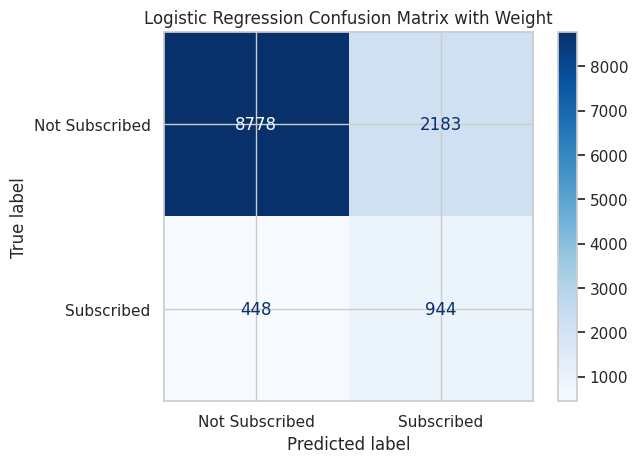

In [ ]:
# Logistics regression using class weight.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', solver='liblinear'))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# **Calculate and print accuracy**
acc_optimized = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Logistics Regression Model: {acc_optimized:.4f}")



# Evaluation
print("Logistic Regression with class weight")
print(classification_report(y_test, y_pred))

# Create ConfusionMatrixDisplay with custom labels
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    display_labels=["Not Subscribed", "Subscribed"]
)

plt.title("Logistic Regression Confusion Matrix with Weight")
plt.show()

Test Accuracy with SMOTE: 0.7873
Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10961
           1       0.30      0.67      0.41      1392

    accuracy                           0.79     12353
   macro avg       0.62      0.73      0.64     12353
weighted avg       0.88      0.79      0.82     12353



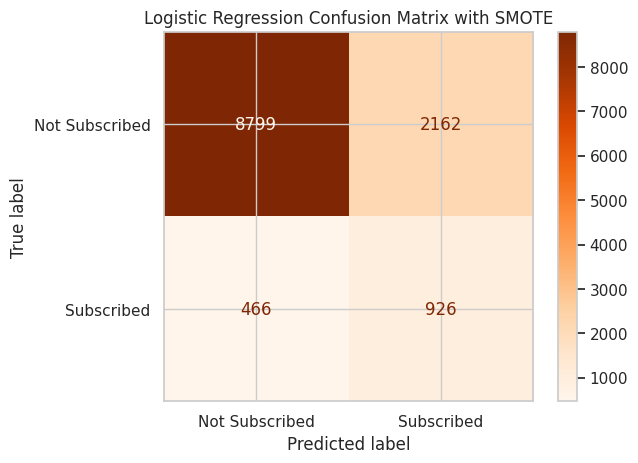

In [ ]:
# Define pipeline with SMOTE and preprocessing
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear'))
])
# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Calculate and print accuracy
acc_smote = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with SMOTE: {acc_smote:.4f}")



#Evaluation
print("Logistic Regression with SMOTE")
print(classification_report(y_test, y_pred))
# Create ConfusionMatrixDisplay with custom labels
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Oranges",
    display_labels=["Not Subscribed", "Subscribed"]
)

# cm_display.plot()  # You might need to call .plot() explicitly
plt.title("Logistic Regression Confusion Matrix with SMOTE")
plt.show()



Test Accuracy (Without Balancing): 0.9000
Logistic Regression (Without Balancing)
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.67      0.22      0.33      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.60      0.64     12353
weighted avg       0.88      0.90      0.88     12353



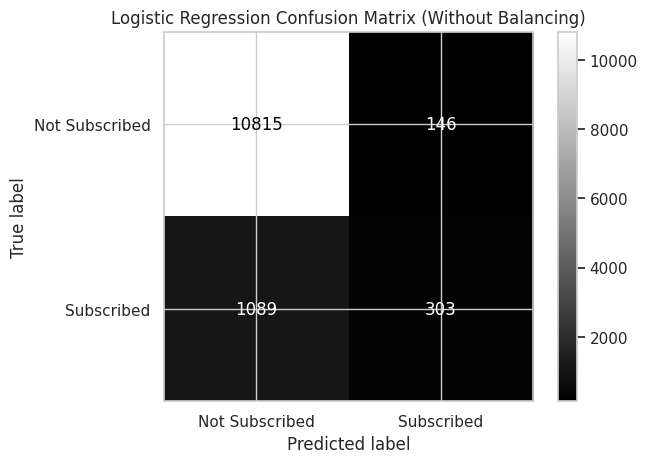

In [ ]:
# Logistic Regression without balancing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))  # No class_weight or SMOTE
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Calculate and print accuracy
acc_no_balancing = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (Without Balancing): {acc_no_balancing:.4f}")


# Evaluation
print("Logistic Regression (Without Balancing)")
print(classification_report(y_test, y_pred))


# Create ConfusionMatrixDisplay with custom labels
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="grey",
    display_labels=["Not Subscribed", "Subscribed"]
)

# cm_display.plot()  # You might need to call .plot() explicitly
plt.title("Logistic Regression Confusion Matrix (Without Balancing)")
plt.show()

#DECISION TREE

Test Accuracy (Decision Tree with Class Weights): 0.8661
🌳 Decision Tree with Class Weights
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10961
           1       0.43      0.58      0.49      1392

    accuracy                           0.87     12353
   macro avg       0.69      0.74      0.71     12353
weighted avg       0.89      0.87      0.87     12353



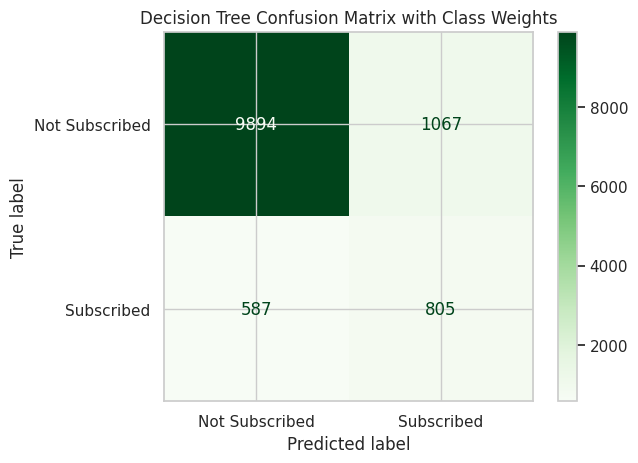

In [ ]:
#  Assuming preprocessor is already defined from the Logistic Regression section

# Using class_weight='balanced'
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
# The Decision Tree model is created and trained directly using the transformed data.

tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
tree_model.fit(X_train_transformed, y_train)

y_pred_tree = tree_model.predict(X_test_transformed)

# Calculate and print accuracy
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Test Accuracy (Decision Tree with Class Weights): {acc_tree:.4f}")


print("🌳 Decision Tree with Class Weights")
print(classification_report(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Greens", display_labels=["Not Subscribed", "Subscribed"])
plt.title("Decision Tree Confusion Matrix with Class Weights")
plt.show()


#XGBoost Classifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:07:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy (XGBoost - Unbalanced): 0.8986
🌳 XGBoost (Without Imbalance Handling and Pipeline, Reusing Transformed Data)
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10961
           1       0.61      0.28      0.38      1392

    accuracy                           0.90     12353
   macro avg       0.76      0.63      0.66     12353
weighted avg       0.88      0.90      0.88     12353



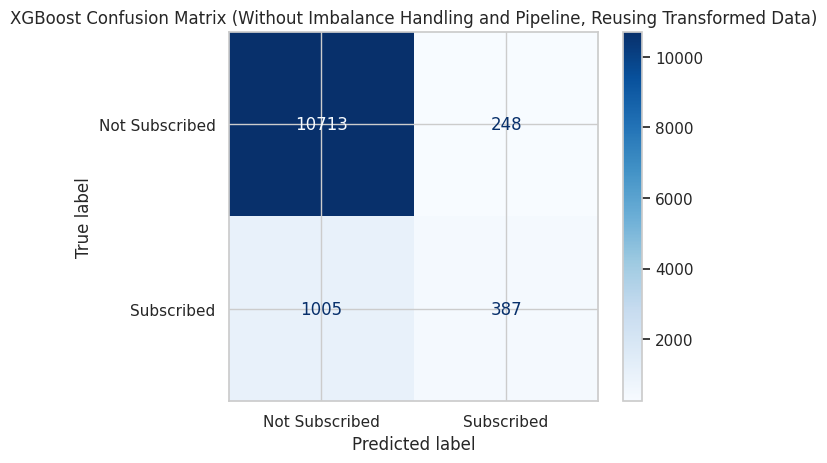

In [ ]:
# Assuming X_train_transformed, X_test_transformed are already defined from the Decision Tree section.



#  XGBoost model (unbalance)
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)
xgb_model.fit(X_train_transformed, y_train)

y_pred_xgb = xgb_model.predict(X_test_transformed)

# Calculate and print accuracy
acc_xgb_unbalanced = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy (XGBoost - Unbalanced): {acc_xgb_unbalanced:.4f}")


print("🌳 XGBoost (Without Imbalance Handling and Pipeline, Reusing Transformed Data)")
print(classification_report(y_test, y_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap="Blues", display_labels=["Not Subscribed", "Subscribed"])
plt.title("XGBoost Confusion Matrix (Without Imbalance Handling and Pipeline, Reusing Transformed Data)")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:08:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy (XGBoost - Balanced with scale_pos_weight): 0.8359
🌳 XGBoost (Handling Class Imbalance using scale_pos_weight)
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     10961
           1       0.36      0.60      0.45      1392

    accuracy                           0.84     12353
   macro avg       0.65      0.73      0.68     12353
weighted avg       0.88      0.84      0.85     12353



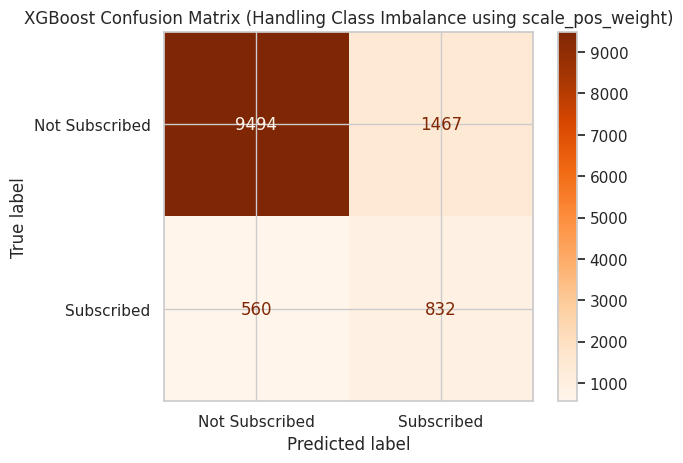

In [ ]:
#  Calculate the scale_pos_weight based on the imbalance ratio
negative_class_count = (y_train == 0).sum()
positive_class_count = (y_train == 1).sum()
scale_pos_weight = negative_class_count / positive_class_count

# 3. Create and train the XGBoost model with scale_pos_weight
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)
xgb_model.fit(X_train_transformed, y_train)

y_pred_xgb = xgb_model.predict(X_test_transformed)

# Calculate and print accuracy
acc_xgb_balanced = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy (XGBoost - Balanced with scale_pos_weight): {acc_xgb_balanced:.4f}")

print("🌳 XGBoost (Handling Class Imbalance using scale_pos_weight)")
print(classification_report(y_test, y_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap="Oranges", display_labels=["Not Subscribed", "Subscribed"])
plt.title("XGBoost Confusion Matrix (Handling Class Imbalance using scale_pos_weight)")
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:12:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy (XGBoost - Hyperparameter Tuned): 0.8598
🌳 XGBoost with Hyperparameter Tuning (RandomizedSearchCV)
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10961
           1       0.40      0.52      0.46      1392

    accuracy                           0.86     12353
   macro avg       0.67      0.71      0.69     12353
weighted avg       0.88      0.86      0.87     12353



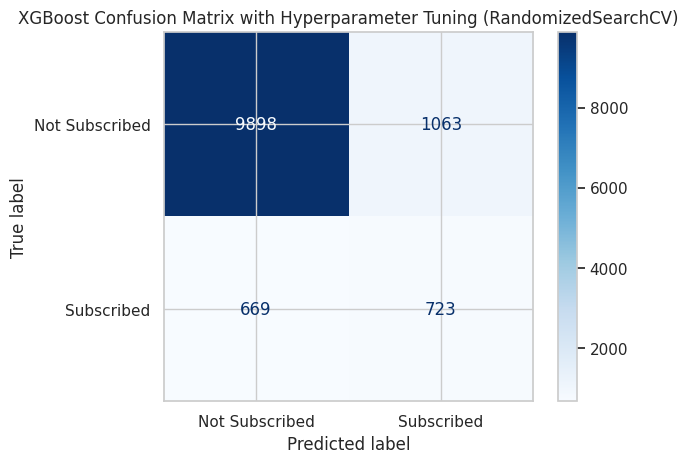

Best Hyperparameters Found:
{'subsample': 0.9, 'n_estimators': np.int64(200), 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
#hyperparameter tuning
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)

param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}


random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_transformed, y_train)

best_model = random_search.best_estimator_

y_pred_xgb = best_model.predict(X_test_transformed)

# Calculate and print accuracy
acc_xgb_tuned = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy (XGBoost - Hyperparameter Tuned): {acc_xgb_tuned:.4f}")

print("🌳 XGBoost with Hyperparameter Tuning (RandomizedSearchCV)")
print(classification_report(y_test, y_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap="Blues", display_labels=["Not Subscribed", "Subscribed"])  # Visualize the confusion matrix
plt.title("XGBoost Confusion Matrix with Hyperparameter Tuning (RandomizedSearchCV)")
plt.show()

print("Best Hyperparameters Found:")
print(random_search.best_params_)

# ROC & AUC


🔍 Logistic Regression (Weighted)
[[8778 2183]
 [ 448  944]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10961
           1       0.30      0.68      0.42      1392

    accuracy                           0.79     12353
   macro avg       0.63      0.74      0.64     12353
weighted avg       0.88      0.79      0.82     12353


🔍 Decision Tree (Weighted)
[[9894 1067]
 [ 587  805]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10961
           1       0.43      0.58      0.49      1392

    accuracy                           0.87     12353
   macro avg       0.69      0.74      0.71     12353
weighted avg       0.89      0.87      0.87     12353



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 XGBoost Classifier (Weighted)
[[9494 1467]
 [ 560  832]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     10961
           1       0.36      0.60      0.45      1392

    accuracy                           0.84     12353
   macro avg       0.65      0.73      0.68     12353
weighted avg       0.88      0.84      0.85     12353



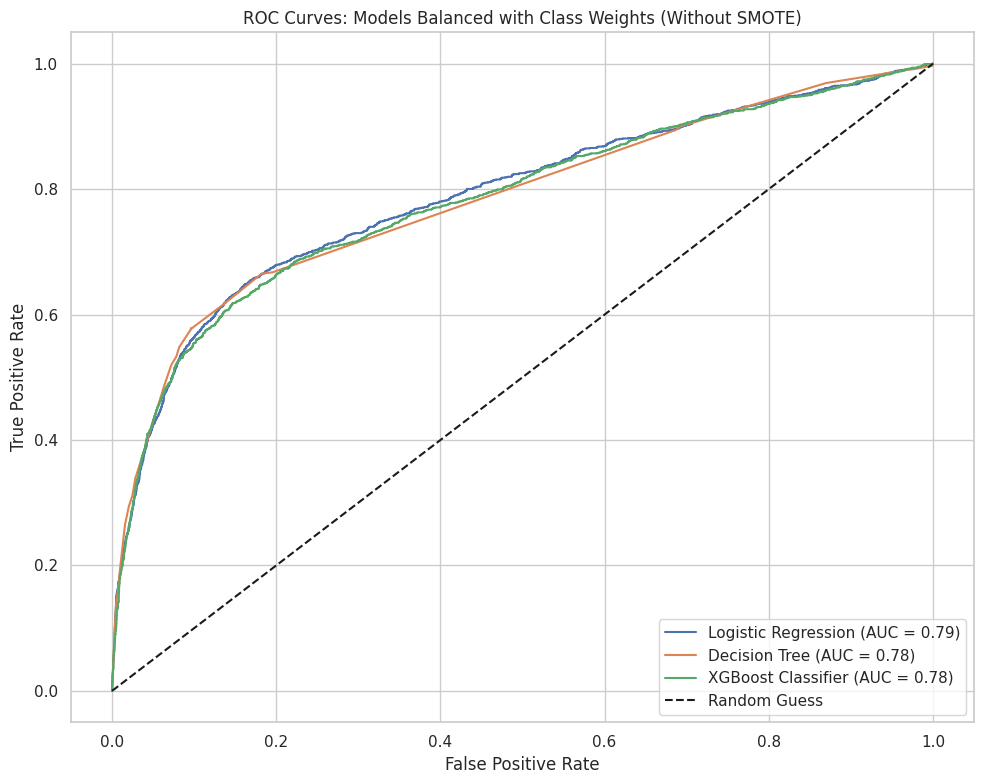


📊 Model Performance Comparison (Balanced):
                     Accuracy  Precision    Recall  F1 Score-class1   AUC_ROC
Model                                                                        
Logistic Regression  0.787015   0.301887  0.678161         0.417792  0.788046
Decision Tree        0.866105   0.430021  0.578305         0.493260  0.783027
XGBoost Classifier   0.835910   0.361896  0.597701         0.450826  0.782292


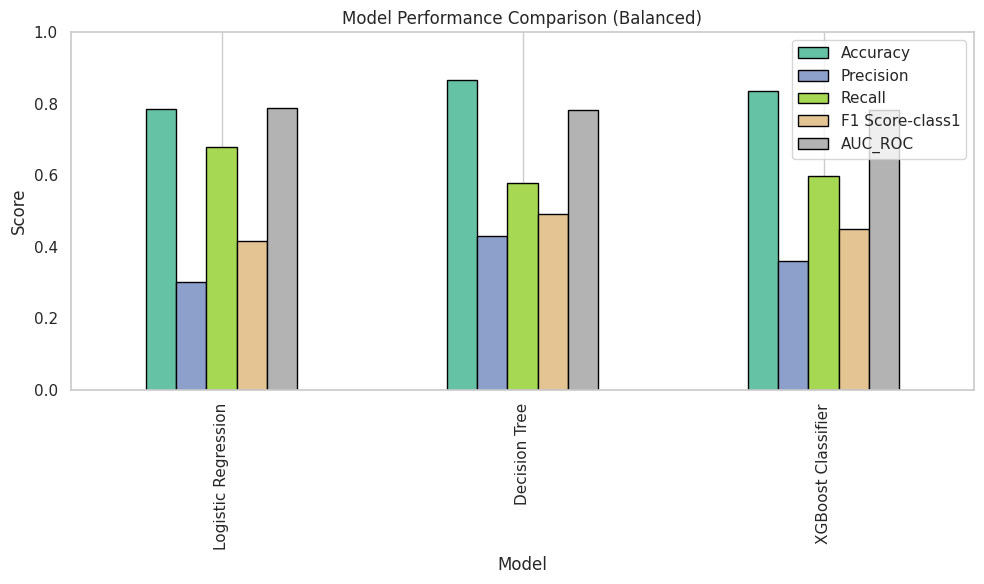

In [ ]:
#balanced
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report # Importing necessary metrics


models_weighted = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced'),
    "XGBoost Classifier": XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
}


results_weighted = []


plt.figure(figsize=(10, 8))

for name, model in models_weighted.items():

    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    print(f"\n🔍 {name} (Weighted)")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    results_weighted.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score-class1": f1_score(y_test, y_pred),
        "AUC_ROC": roc_auc_score(y_test, y_prob)
    })

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")


plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curves: Models Balanced with Class Weights (Without SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


results_df_weighted = pd.DataFrame(results_weighted).set_index("Model")
print("\n📊 Model Performance Comparison (Balanced):")
print(results_df_weighted)



results_df_weighted[["Accuracy", "Precision", "Recall", "F1 Score-class1", "AUC_ROC"]].plot(kind="bar", figsize=(10, 6), colormap="Set2", edgecolor="black")  # Removed redundant indexing
plt.title("Model Performance Comparison (Balanced)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()




🔍 Logistic Regression (Unbalanced)
[[10815   146]
 [ 1089   303]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.67      0.22      0.33      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.60      0.64     12353
weighted avg       0.88      0.90      0.88     12353


🔍 Decision Tree (Unbalanced)
[[10803   158]
 [ 1044   348]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.69      0.25      0.37      1392

    accuracy                           0.90     12353
   macro avg       0.80      0.62      0.66     12353
weighted avg       0.89      0.90      0.88     12353



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 XGBoost (Unbalanced)
[[10713   248]
 [ 1005   387]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10961
           1       0.61      0.28      0.38      1392

    accuracy                           0.90     12353
   macro avg       0.76      0.63      0.66     12353
weighted avg       0.88      0.90      0.88     12353



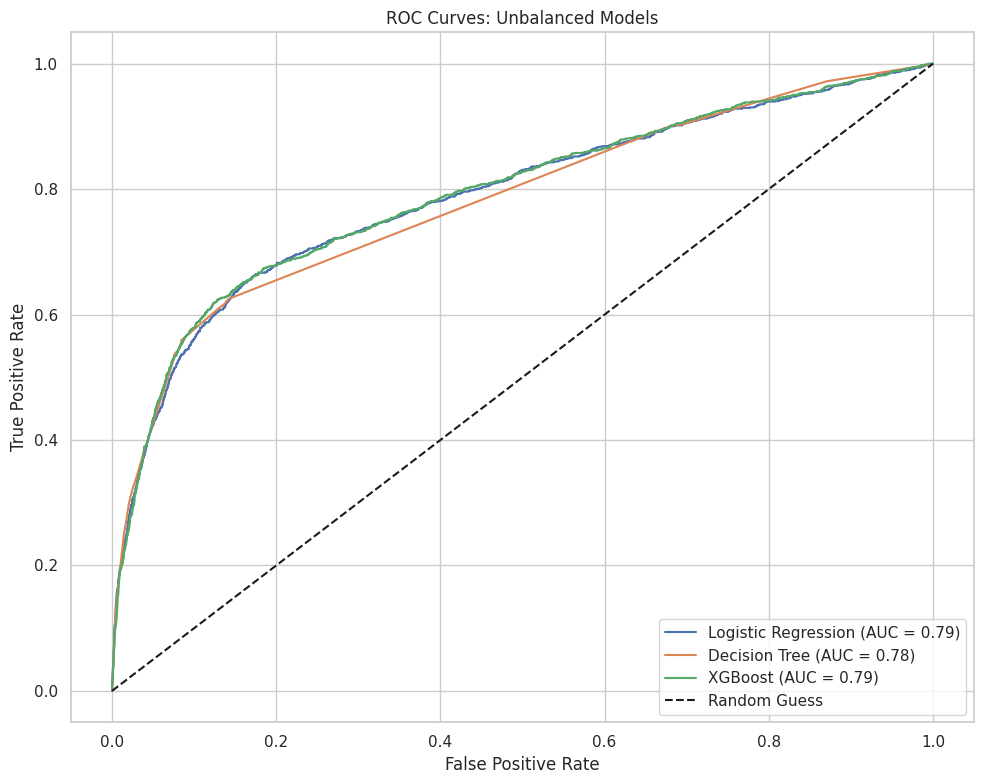


📊 Model Performance Comparison (Unbalanced):
                     Accuracy  Precision    Recall  F1 Score-class1   AUC_ROC
Model                                                                        
Logistic Regression  0.900024   0.674833  0.217672         0.329169  0.788504
Decision Tree        0.902696   0.687747  0.250000         0.366702  0.781876
XGBoost              0.898567   0.609449  0.278017         0.381845  0.791295


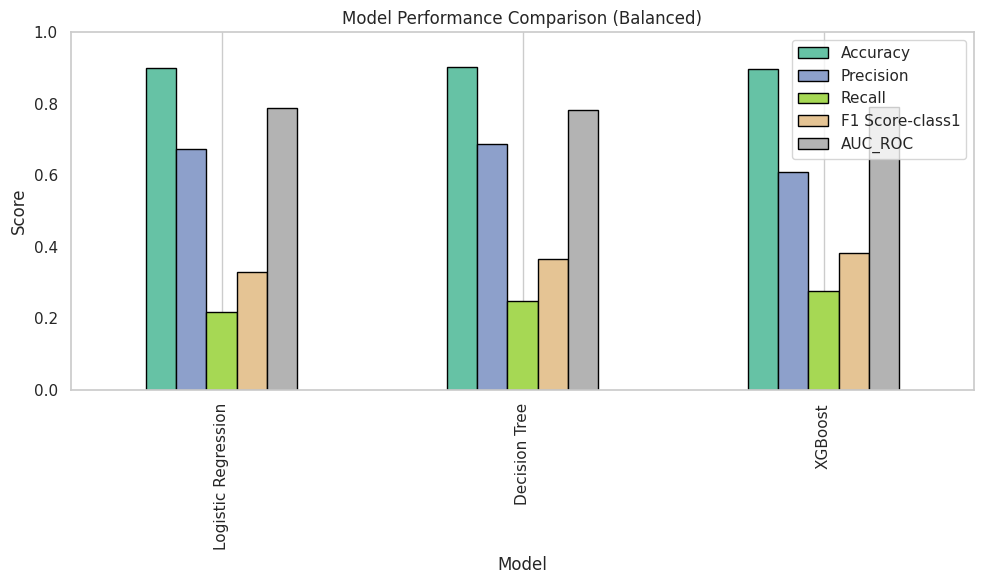

In [ ]:
# Models without balancing techniques

models_unbalanced = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


results_unbalanced = []

plt.figure(figsize=(10, 8))

for name, model in models_unbalanced.items():

    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    print(f"\n🔍 {name} (Unbalanced)")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    results_unbalanced.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score-class1": f1_score(y_test, y_pred),
        "AUC_ROC": roc_auc_score(y_test, y_prob)
    })

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curves: Unbalanced Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

results_df_unbalanced = pd.DataFrame(results_unbalanced).set_index("Model")
print("\n📊 Model Performance Comparison (Unbalanced):")
print(results_df_unbalanced)

results_df_unbalanced[["Accuracy", "Precision", "Recall", "F1 Score-class1", "AUC_ROC"]].plot(
    kind="bar", figsize=(10, 6), colormap="Set2", edgecolor="black"
)
plt.title("Model Performance Comparison (Balanced)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.tight_layout()
plt.show()